# Digit Classification Project
In this project we used tensorflow to make a digit classifier from images using the mnist database of around 42000 images for training and 600 images for testing and evaluating the model.

## Importing necessary libraries and downloading the dataset from Kaggle

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import cv2

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # Use the uploaded Kaggle.json for downloading dataset from kaggle
!kaggle datasets download -d scolianni/mnistasjpg
! unzip mnistasjpg.zip -d train # Unzip the dataset into the 'train' directory

We are using PIL library to load images in the notebook and matplotlib.pyplot to display images and graphs

In [ ]:
#Display a test image to verify that data has been loaded successfully
test_img = Image.open("train/trainingSet/trainingSet/0/img_10017.jpg")
plt.figure()
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.show()
test_img = Image.open("train/trainingSet/trainingSet/2/img_10050.jpg")
plt.figure()
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.show()
test_img = Image.open("train/trainingSet/trainingSet/8/img_10063.jpg")
plt.figure()
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.show()
test_img = Image.open("train/trainingSet/trainingSet/9/img_10120.jpg")
plt.figure()
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Creating the datasets
Here we used the tensorflow built in method **tf.keras.utils.image_from_directory** to create training, validation and testing  datasets.
It easily loads images from directories into the Keras model. It takes an argument of a directory path of images, and then it generates a tensor or array containing image data along with labels. The labels are inferred from the subdirectory name, which helps in quickly classifying images.

Here the images were in gray scale and of size 30px x 30px. We divided our training data of 42000 images into two splits of ratio 1:4, namely validation and training, respectively.
We did our training in mini-batch size of 64 so as to speed up the training process.

In [7]:
#forming the dataset (train, validation and tests) from data
seed = 42
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "train/trainingSet/trainingSet",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode='grayscale',
    batch_size=64,
    image_size=(30,30),
    shuffle=True,
    subset = "training",
    validation_split = 0.2,
    seed=seed,
    interpolation='bilinear',
    crop_to_aspect_ratio=True,
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    "train/trainingSet/trainingSet",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode='grayscale',
    batch_size=64,
    image_size=(30,30),
    shuffle=True,
    subset = "validation",
    validation_split = 0.2,
    seed=seed,
    interpolation='bilinear',
    crop_to_aspect_ratio=True,
)
seed = 15
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "train/trainingSample/trainingSample",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode='grayscale',
    batch_size=64,
    image_size=(30,30),
    shuffle=True,
    seed=seed,
    interpolation='bilinear',
    crop_to_aspect_ratio=True,
)

Found 42000 files belonging to 10 classes.
Using 33600 files for training.
Found 42000 files belonging to 10 classes.
Using 8400 files for validation.
Found 600 files belonging to 10 classes.


## Creating the model
Here we define the main sequential model using keras that provides us with a variety of layers like BatchNormalization, Dense, Dropout, Flatten to add in our deep learning model.
Here we used Flatten layer to convert the matrix input of size 30x30x1 to the vector of size 900x1.
The structure of our model is as follows:
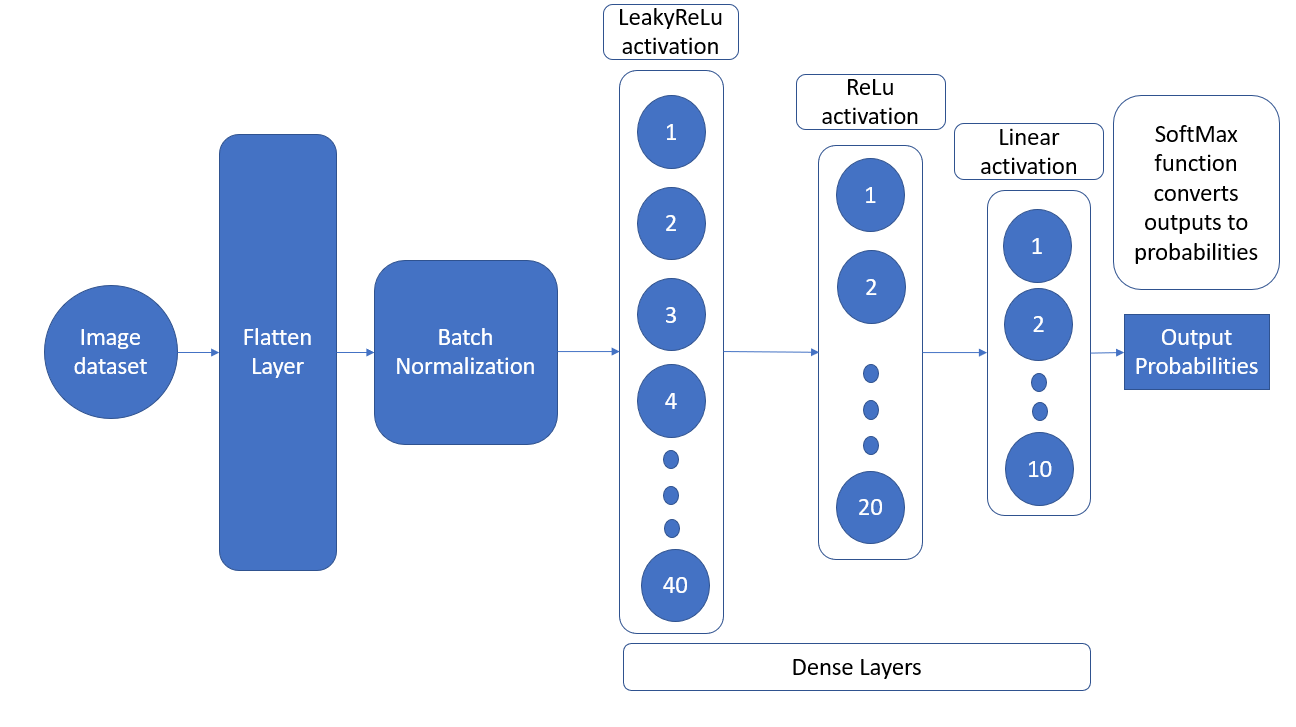

The BatchNormalization help speed up the learning process. Also the leakyReLU and ReLU layers help in achieving better accuracy by better fitting the data.

In [8]:
# Tensorflow Sequential Model
model = tf.keras.Sequential([    
    tf.keras.layers.Flatten(input_shape=(30,30,1)),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(40,activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 900)               0         
                                                                 
 batch_normalization (BatchN  (None, 900)              3600      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 40)                36040     
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,670
Trainable params: 38,870
Non-trainable params: 1,800
________________________________________________

In [9]:
#Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Training the model
We let our model train on the train_dataset created above and also use the validation_dataset to ensure the model is not overfitting the data.
We train this model for 15 epochs as we find that the model's accuracy reach an equilibrium after that.

In [10]:
#Fitting training data and checking the results on validation
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 15)

Epoch 1/15
525/525 [==============================] - 11s 19ms/step - loss: 0.4446 - accuracy: 0.8639 - val_loss: 0.2269 - val_accuracy: 0.9324
Epoch 2/15
525/525 [==============================] - 10s 18ms/step - loss: 0.1896 - accuracy: 0.9417 - val_loss: 0.1885 - val_accuracy: 0.9456
Epoch 3/15
525/525 [==============================] - 8s 15ms/step - loss: 0.1432 - accuracy: 0.9566 - val_loss: 0.1683 - val_accuracy: 0.9499
Epoch 4/15
525/525 [==============================] - 9s 18ms/step - loss: 0.1180 - accuracy: 0.9628 - val_loss: 0.1649 - val_accuracy: 0.9508
Epoch 5/15
525/525 [==============================] - 9s 18ms/step - loss: 0.0978 - accuracy: 0.9698 - val_loss: 0.1537 - val_accuracy: 0.9551
Epoch 6/15
525/525 [==============================] - 14s 25ms/step - loss: 0.0862 - accuracy: 0.9714 - val_loss: 0.1476 - val_accuracy: 0.9570
Epoch 7/15
525/525 [==============================] - 8s 15ms/step - loss: 0.0783 - accuracy: 0.9741 - val_loss: 0.1560 - val_accuracy: 0.9

## Evaluating the model
We evaluate the model on the basis of loss and accuracy on test data. We can also see how the model improve with the number of epochs.

In [11]:
#Evaluating model on test dataset for loss and accuracy
results = model.evaluate(test_dataset)
print("Loss: " , round(results[0], 4))
print("Accuracy: " , round(results[1]*100, 2), "%")

10/10 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9900
Loss:  0.0495
Accuracy:  99.0 %


In [12]:
#Saving the model for future use
model.save("Digit_Classifier.h5")

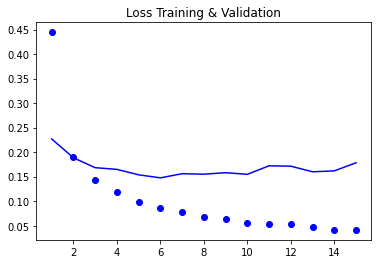

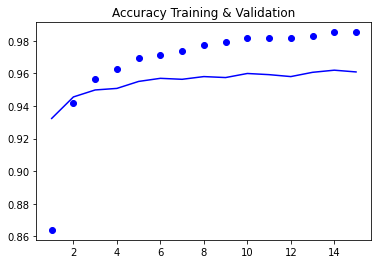

In [14]:
#Plotting the loss function over no. of epochs
D = history.history
loss = D['loss']
val_loss = D['val_loss']
acc = D['accuracy']
val_acc = D['val_accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Loss Training & Validation')
plt.show()
plt.plot(epochs, acc, 'bo', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Accuracy Training & Validation')
plt.show()

2/2 [==============================] - 0s 6ms/step
<class 'tensorflow.python.framework.ops.EagerTensor'>


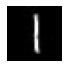

Actual Label: 1
Prediction: 1


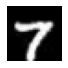

Actual Label: 7
Prediction: 7


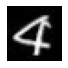

Actual Label: 4
Prediction: 2


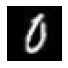

Actual Label: 0
Prediction: 0


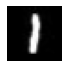

Actual Label: 1
Prediction: 1


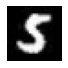

Actual Label: 5
Prediction: 5


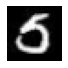

Actual Label: 5
Prediction: 5


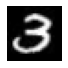

Actual Label: 3
Prediction: 3


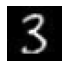

Actual Label: 3
Prediction: 3


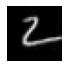

Actual Label: 2
Prediction: 2


In [24]:
#For some images in test data print actual and predicted label
for images, labels in test_dataset.take(1):
  p = model.predict(images)
  print(type(images))
  for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(images.numpy()[i].reshape((30,30)), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    print("Actual Label:", labels.numpy()[i])
    print("Prediction:", np.argmax(p[i]))

## Testing the model on custom input
Here we can see our model predict on custom input given by the user.

1/1 [==============================] - 0s 18ms/step


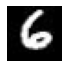

Predicted Digit: 6
Probability: tf.Tensor(1.0, shape=(), dtype=float32)


In [58]:
# Working with our own input data
image = Image.open('train/testSample/img_174.jpg').convert("L")
image = image.resize((30,30))
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
image = (np.expand_dims(image,0))
result = model.predict(image)
plt.show()
result = tf.nn.softmax(result)
print("Predicted Digit:", np.argmax(result))
print("Probability:", result[0][np.argmax(result)])

## Results
With just 15 epochs and only 4-5 minutes of training time, our model has achieved an **accuracy of around 99%** on test data. The train dataset accuracy is also similar to test data accuracy which implies that our model is neither underfitting nor overfitting the data and the model can very well generalize to new inputs.